Problem 5a (I).

- We construct a diagonal matrix W with element $W_{ii}$ are weight $w_i$

- Therefore, the problem can be written as:
\begin{equation*}
J(\theta) = (X\theta - y)^TW(X\theta - y)
\end{equation*}

Problem 5a (II).

- If all $w_i$ is equal to 1, which mean that $J(\theta)$ can be written as:
\begin{equation*}
J(\theta) = (X\theta - y)^T(X\theta - y) = \|X\theta - y\|^2
\end{equation*}
- Therefore, the solution of this is the same as the solution of OSL:
\begin{equation*}
X^TX\theta = X^Ty
\end{equation*}

Problem 5a (III).
\begin{align*}
\ell(y^{(i)},x^{(i)},\theta,\sigma) &= \log \prod_{i=1}^m \frac{1}{\sqrt{2\pi}\sigma^{(i)}}\exp\left(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\right) \\
&= \sum_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma^{(i)}} - \sum_{i=1}^m\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} \\
& = \sum_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma^{(i)}} - \sum_{i=1}^m \frac{(y^{(i)}-\theta^Tx^{(i)})^2}{(\sigma^{(i)})^2} \\
& = \sum_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma^{(i)}} - \frac{1}{2}(X\theta - y)^TW(X\theta - y)
\end{align*}
- Therefore, maximum the log-likelihood can be reduced to solving the weighted linear regression.

- W is a diagonal matrix with element $W_{ii}$ is $(\sigma^{(i)})^2$.

- We also obtain the result of $\theta$:
\begin{equation*}
(X^TWX)\theta = X^TWy \Rightarrow \theta = (X^TWX)^{-1}X^TWy
\end{equation*}


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from util import *

from linear_model import LinearModel

class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        
        pred = np.zeros(m)

        for i in range(m):
            w_i = np.exp(-np.sum((self.x - x[i])**2, axis = 1)/(2*self.tau**2))
            theta_i = np.linalg.inv((self.x.T * w_i) @ self.x) @ ((self.x.T * w_i) @ self.y)
            pred[i] = theta_i.T @ x[i]
        # *** END CODE HERE ***
        return pred


In [36]:
train_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds5_train.csv"
valid_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds5_valid.csv"
test_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds5_test.csv"

x_valid, y_valid = load_dataset(valid_path, add_intercept=True)
x_train, y_train = load_dataset(train_path, add_intercept=True)
x_test, y_test = load_dataset(test_path, add_intercept=True)

lin_reg = LocallyWeightedLinearRegression(tau=0.5)
lin_reg.fit(x_train, y_train)

MSE is:  0.325352359502121


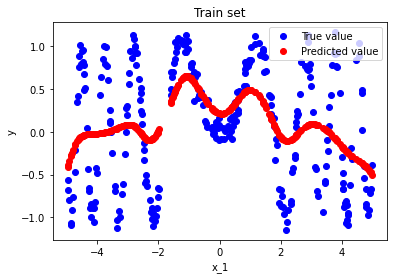

In [37]:
print("MSE is: ", np.mean((y_train-lin_reg.predict(x_train))**2))
plt.xlabel('x_1')
plt.ylabel('y')
plt.title ('Train set')
plt.plot(x_train[:, -1], y_train, 'bo', label = 'True value')
plt.plot(x_train[:, -1], lin_reg.predict(x_train), 'ro', label = 'Predicted value')
plt.legend(loc='upper right')
plt.show()

MSE is:  0.33053126821375256


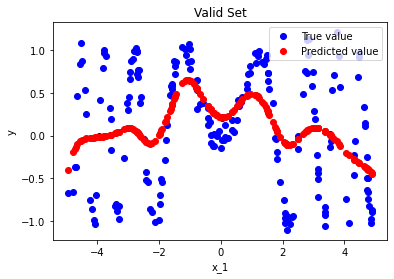

In [38]:
print("MSE is: ", np.mean((y_valid-lin_reg.predict(x_valid))**2))
plt.xlabel('x_1')
plt.ylabel('y')
plt.title ('Valid Set')
plt.plot(x_valid[:, -1], y_valid, 'bo', label = 'True value')
plt.plot(x_valid[:, -1], lin_reg.predict(x_valid), 'ro', label = 'Predicted value')
plt.legend(loc='upper right')
plt.show()

In [41]:
def plot(x, y, y_p, tau, Type = 'Validation'):
    plt.xlabel('x_1')
    plt.ylabel('y')
    plt.title (Type + ' set, tau = %s' %tau)
    plt.plot(x, y, 'bo', label = 'True value')
    plt.plot(x, y_p, 'ro', label = 'Predicted value')
    plt.legend(loc='upper right')
    plt.show()
    print("MSE for " +Type+ " set: ", np.mean((y-y_p)**2))

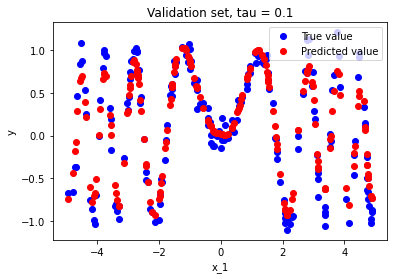

MSE for Validation set:  0.02422458937980763


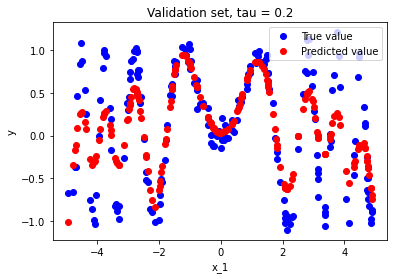

MSE for Validation set:  0.11479589419721144


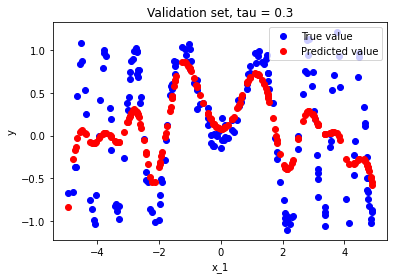

MSE for Validation set:  0.2167566978605716


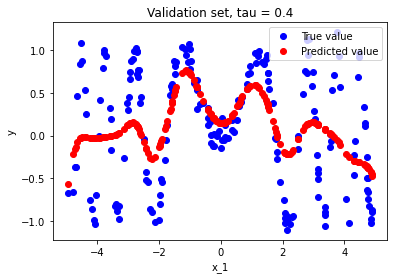

MSE for Validation set:  0.2861705209482265


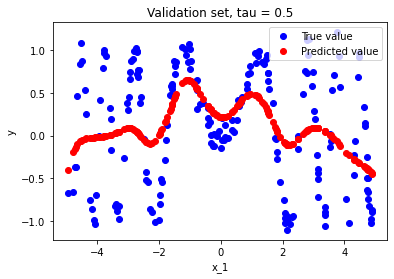

MSE for Validation set:  0.33053126821375256


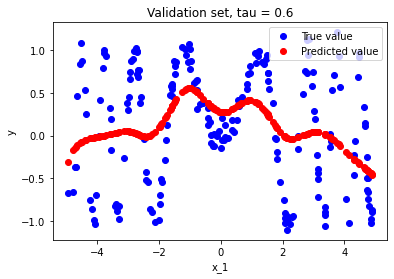

MSE for Validation set:  0.3596221527149177


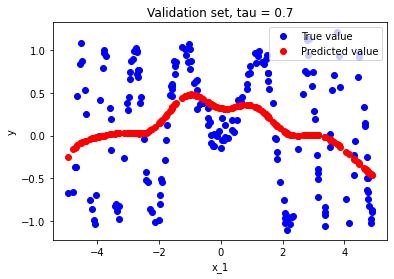

MSE for Validation set:  0.3784244811455213


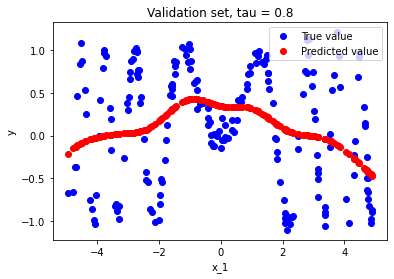

MSE for Validation set:  0.38990669904261027


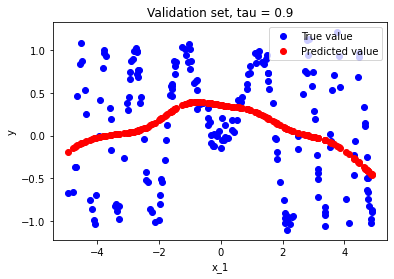

MSE for Validation set:  0.39648152700030276


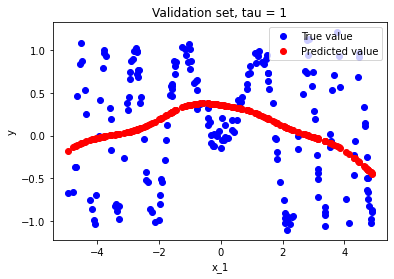

MSE for Validation set:  0.40009594801808623
Optimal tau is:  0.1


In [43]:
def find_optimum_tau(tau_value):
    min_error = np.inf
    best_tau = None
    for tau in tau_value:
        lin_reg = LocallyWeightedLinearRegression(tau = tau)
        lin_reg.fit(x_train, y_train)
        y_pred = lin_reg.predict(x_valid)
        error = np.mean((y_valid-y_pred)**2)
        plot(x_valid[:, -1], y_valid, y_pred, tau = tau)
        
        if error < min_error:
            min_error = error
            best_tau = tau
    return best_tau

tau_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
print("Optimal tau is: ",find_optimum_tau(tau_value))

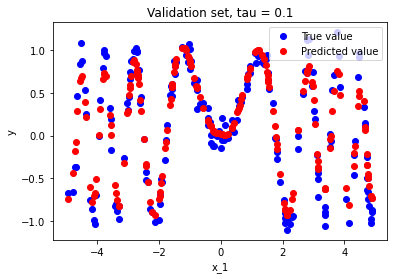

MSE for Validation set:  0.02422458937980763


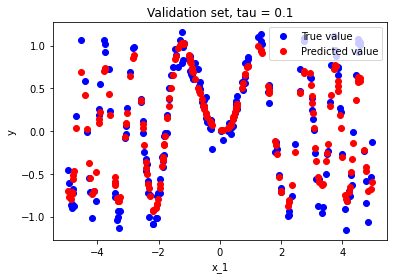

MSE for Validation set:  0.029192011594753774


In [47]:
lin_reg = LocallyWeightedLinearRegression(tau = 0.1)
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_valid)
plot(x_valid[:, -1], y_valid, y_pred, tau = 0.1)

y_pred = lin_reg.predict(x_test)
plot(x_test[:, -1], y_test, y_pred, tau = 0.1)